In [1]:
import jax.numpy as jnp
from qurveros.spacecurve import SpaceCurve

import qurveros.plot_configs
from qurveros.settings import settings

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150

This example will introduce how to extract pulses using `qurveros`.
In SCQC, the quantum evolution is associated with a space curve.
Here, we will use a constant pulse to demonstrate the basic workflow.

A circle in the 2D plane retains a constant curvature throughout its traversal.
We can define the function that returns the position vector of a circle using
the trigonometric functions.

Since the involved quantities must be differentiable, 
we use JAX's numpy API.

In [2]:
def circle(x, params):

    return [jnp.cos(x), jnp.sin(x), 0]

We create a SpaceCurve instance by supplying the function, 
the value of the order (which specifies if it's the curve or the tangent)
and the endpoints of the interval. 

In this example, although no parameters are used to modify the argument of the 
trigonometric functions, the function signature must still be f(x, params).

In [3]:
spacecurve = SpaceCurve(curve=circle,
                        order=0,
                        interval=[0, 2*jnp.pi])

Aan instance of the SpaceCurve class contains all the necessary
information for SCQC. The evaluation of the geometric quantities requires
the user to invoke the related methods, for more flexible use of the framework.

We can now evaluate all the required geometric properties associated with the
curve using the .evaluate_frenet_dict() method.

See the qurveros/settings.py file for the default settings that specify
the number of samples in the curve parameter interval.

In [4]:
spacecurve.evaluate_frenet_dict()

The frenet dictionary can be retrieved using the instance's getter.

Treating the SpaceCurve instance as list, indexing it returns a reduced
version of the frenet dictionary at the specified point.

In [5]:
spacecurve[0]

{'curve': Array([1., 0., 0.], dtype=float64),
 'frame': Array([[ 0.,  1.,  0.],
        [-1.,  0.,  0.],
        [ 0., -0.,  1.]], dtype=float64),
 'curvature': Array(1., dtype=float64),
 'torsion': Array(0., dtype=float64),
 'deriv_array': Array([[ 0.,  1.,  0.],
        [-1.,  0.,  0.],
        [ 0., -1.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  1.,  0.]], dtype=float64),
 'length': np.float64(0.0)}

The robustness properties can be evaluated using the following method.

In [6]:
spacecurve.evaluate_robustness_properties()

The RobustnessProperties is a special object that calculates the robustness
properties of the curve and prints the associated coefficient that
appears in average gate fidelity calculations.

In [7]:
spacecurve.get_robustness_properties()

|       closed_test       : 	 1.5196e-33
|     curve_area_test     : 	 2.5330e-02
|    tantrix_area_test    : 	 3.9478e+01
|           CFI           : 	 2.5330e-02


For a more comprehensive introduction to SCQC and the interpretation of the robustness properties, please refer to the papers in the README file and the `bessel_curve_robust_pulse` example.

As expected, the curve is closed since we created a circle with full period.

We can now plot the position vector and the tangent respectively, to confirm
that we have designed a circle.

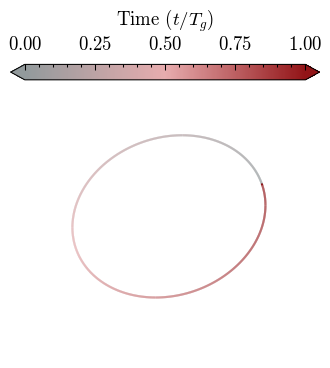

In [8]:
spacecurve.plot_position()
plt.gca().view_init(elev=90, roll=50)

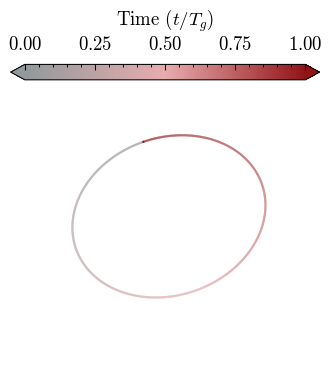

In [9]:
spacecurve.plot_tantrix()
plt.gca().view_init(elev=90, roll=50)

Since time is the arclength parameterization of the curve, the hue indicates
the direction of the traversal, for increasing length away from the starting
point.

To extract the control fields, we evaluate the control dictionary depending
on the control mode. In this example, we used resonant control.

See controltools.py for the available modes.

In [10]:
spacecurve.evaluate_control_dict('XY')

We can also plot the fields using the provided method.

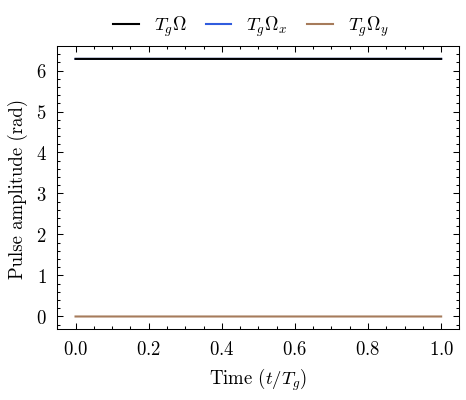

In [11]:
spacecurve.plot_fields('compact')

In this plot, $T_g$ refers to the total gate time, which in SCQC, it coincides 
with the total length of the curve. This example is exactly solvable since
we have a constant envelope. The total angle of rotation should be 
$\Omega t = \Omega T_g \frac{t}{T_g}$ and at $t=T_g$, it should correspond to a 
cyclic evolution, as confirmed from the plot.

In this example, we discussed the basic workflow to describe the space curve
and extract the control fields. See `bessel_curve_robust_pulse.ipynb` for a more
practical example, which also introduces the subpackage `qubit_bench`.

In [12]:
print(settings)

    CURVE_POINTS    : 	 4096
     SIM_POINTS     : 	 4096
   QUTIP_OPTIONS    : 	 {'max_step': 0.0001220703125, 'atol': 1e-14, 'rtol': 1e-14}
  NUM_REALIZATIONS  : 	 200
 FIR_TERMS_FRACTION : 	 0.9
  DELTA_Z_INTERVAL  : 	 (-3, 0)
  EPSILON_INTERVAL  : 	 (-4, -1)
     MAX_POINTS     : 	 12
  COUNTOUR_LEVELS   : 	 (-9, -8, -7, -6, -5)
     NUM_DERIVS     : 	 5
  INFLECTION_NORM   : 	 0.001
      FIX_NORM      : 	 0.01
     NUM_SINGLS     : 	 5
    ANGLE_K_MAX     : 	 3
    FIELD_NAMES     : 	 ['omega', 'phi', 'delta']
     OPT_POINTS     : 	 4096
    CURVE_COLORS    : 	 ['#929A9C', '#E7ACAE', '#921417']
    FIELD_COLORS    : 	 ['#000000', '#305CDE', '#A67B5B']
  COUNTOUR_COLORS   : 	 ['#09B8B8', '#5B5585']

